# CP321 Final Project
Name: Daniel Shapovalov

id: 169032161

<font size="+2.5">Introduction: </font> 

the data that we will be working with provides information regarding to **'wages by education level'** in Ontario. The age groups available in the dataset are: 15+, 25+, 25-34, 25-54 and 25-64. Type of work includes full-time and part-time, the educational levels include: 0-8 yrs., some high school, high school graduate, some post-secondary, post-secondary certificate diploma and university degree. Our specific goal/motivation with this data set is to visualize the disparity in wages amongst different demographic groups. The dataset we are synthesizing should provide a comprehensive overview of wages by education level, offering insights into how educational attainment and age impact earning potential, along with obvserable trends that are going on overtime.

<font size="+2.5">Question: </font> 

What are the most significant disparities in wage compensation across different educational levels amongst different human attributes in Ontario, and which demographic groups exhibit the largest gaps?

<font size="+2.5">Data Link: </font> 

https://data.ontario.ca/en/dataset/wages-by-education-level

<font size="+2.5">Envisoning the Answer: </font> 

We aim to analyze various data attributes, including geographical location, gender, and age range, with a primary focus on comparing disparities across different education levels. Our goal is to identify the highest disparities and common trends within these demographic categories

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
# Reading file 
data = pd.read_csv('7b325fa1-e9d6-4329-a501-08cdc22a79df.csv')

C:\Users\Danny\AppData\Local\Temp\ipykernel_26276\3218869795.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


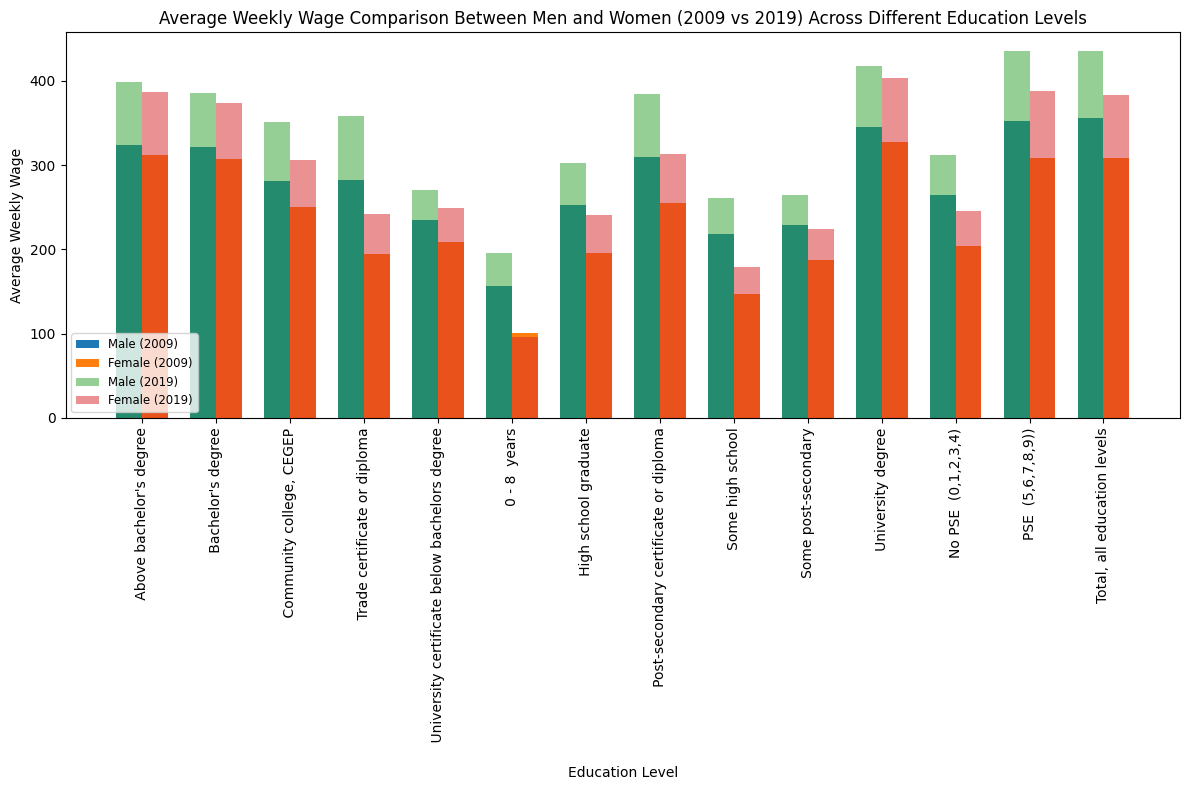

In [2]:
#read data for the years 2009 and 2019
data_2009 = data[data['YEAR'] == 2009]
data_2019 = data[data['YEAR'] == 2019]
#Group data by education level and calculate the mean wage for both sexes
mean_wages_2009 = data_2009.groupby('Education level')[['Male', 'Female']].mean().reset_index()
mean_wages_2019 = data_2019.groupby('Education level')[['Male', 'Female']].mean().reset_index()
#Reorder the DataFrame based on education level
mean_wages_2009 = mean_wages_2009.sort_values(by='Education level')
mean_wages_2019 = mean_wages_2019.sort_values(by='Education level')
# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35
index = np.arange(len(mean_wages_2009))

bar1 = ax.bar(index - bar_width/2, mean_wages_2009['Male'], bar_width, label='Male (2009)')
bar2 = ax.bar(index + bar_width/2, mean_wages_2009['Female'], bar_width, label='Female (2009)')
bar3 = ax.bar(index - bar_width/2, mean_wages_2019['Male'], bar_width, label='Male (2019)', alpha=0.5)
bar4 = ax.bar(index + bar_width/2, mean_wages_2019['Female'], bar_width, label='Female (2019)', alpha=0.5)

ax.set_xlabel('Education Level', fontsize=10)
ax.set_ylabel('Average Weekly Wage')
ax.set_title('Average Weekly Wage Comparison Between Men and Women (2009 vs 2019) Across Different Education Levels')
ax.set_xticks(index)
ax.set_xticklabels(mean_wages_2009['Education level'], rotation=90)

#legend
ax.legend(fontsize='small', loc='lower left')

plt.tight_layout()
plt.show()

# Key Take Aways from visualization #1

The gap between male and female weekly wages has risen significantly over the years, especially in education levels related to 'Trade Certificate and Diploma' and '0-8 years.'

In contrast, the gap between male and female weekly wages is much smaller in areas of higher-level education, such as 'University Degree' and 'Above Bachelor's Degree'."

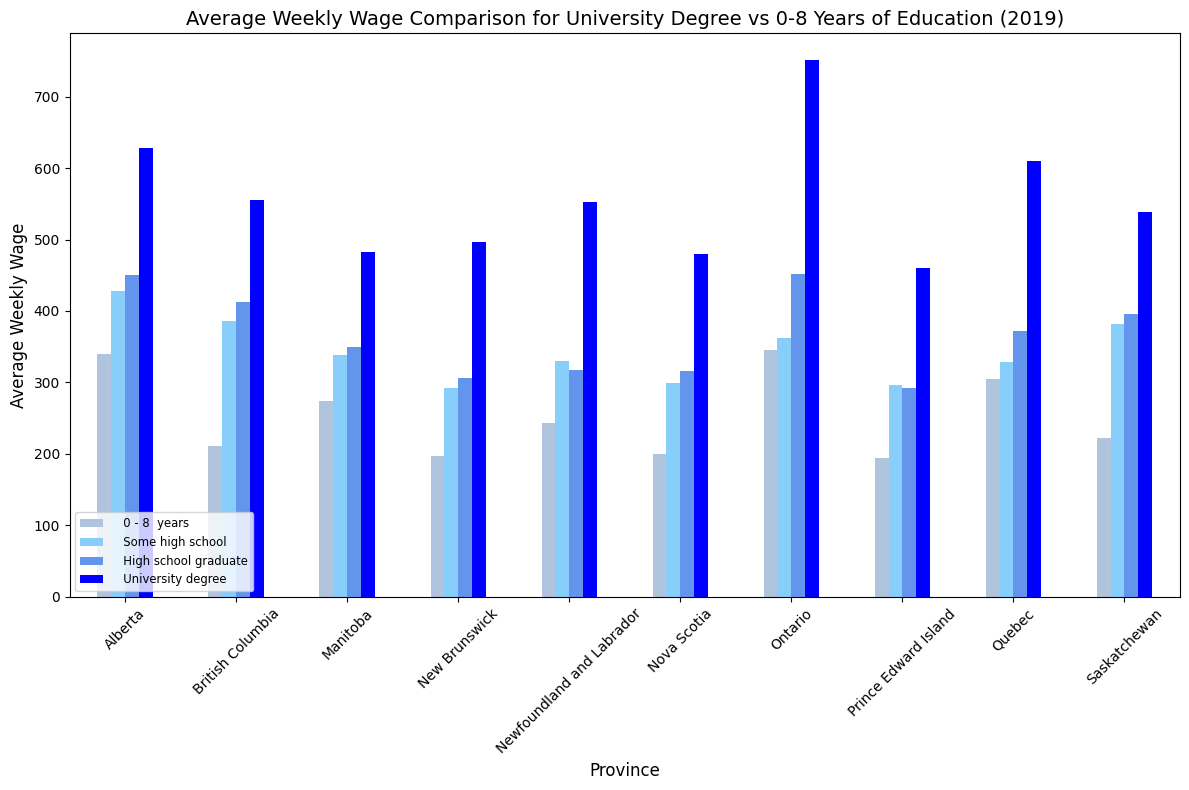

In [3]:

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a dataframe
data = pd.read_csv('7b325fa1-e9d6-4329-a501-08cdc22a79df.csv')

# Convert 'Wages' column to numeric, ignoring non-numeric values
data['Wages'] = pd.to_numeric(data['Wages'], errors='coerce')

# Filter data for full-time workers and select relevant provinces
provinces = ["Ontario",'Quebec','Newfoundland and Labrador','Prince Edward Island',
             'Nova Scotia','New Brunswick','Manitoba','Saskatchewan','Alberta','British Columbia']
data = data[(data['YEAR'] == 2019) & 
            data['Type of work'].str.contains('Full-time', case=False) &
            data["Geography"].isin(provinces)]

# Filter data for university degree and 0-8 years of education
filtered_data = data[data['Education level'].isin(["   0 - 8  years", "   Some high school", "   High school graduate",  "   University degree"])]

# Group data by province and education level and calculate the mean wage for both sexes
average_wages = filtered_data.groupby(['Geography', 'Education level'])['Both Sexes'].mean().reset_index()

# Pivot the dataframe for easy plotting
pivot_df = average_wages.pivot(index='Geography', columns='Education level', values='Both Sexes')

# Reorder the columns in pivot_df
pivot_df = pivot_df[['   0 - 8  years', '   Some high school', '   High school graduate', '   University degree']]

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(12, 8))

pivot_df.plot(kind='bar', ax=ax, color=['lightsteelblue', 'lightskyblue', 'cornflowerblue', 'blue'])

# Adding labels and title
ax.set_xlabel('Province', fontsize=12)
ax.set_ylabel('Average Weekly Wage', fontsize=12)
ax.set_title("Average Weekly Wage Comparison for University Degree vs 0-8 Years of Education (2019)", fontsize=14)
ax.tick_params(axis='x', rotation=45)

# Adding legend
ax.legend(fontsize='small', loc='lower left')

plt.tight_layout()
plt.show()

# Key Take Aways from visualization #2

Ontario is by far the best location to work at with a University degree

apart from ontario the wage compensation in provinces of educational attainment of 'some highschool compared to 'high school graduate' is almost negligible



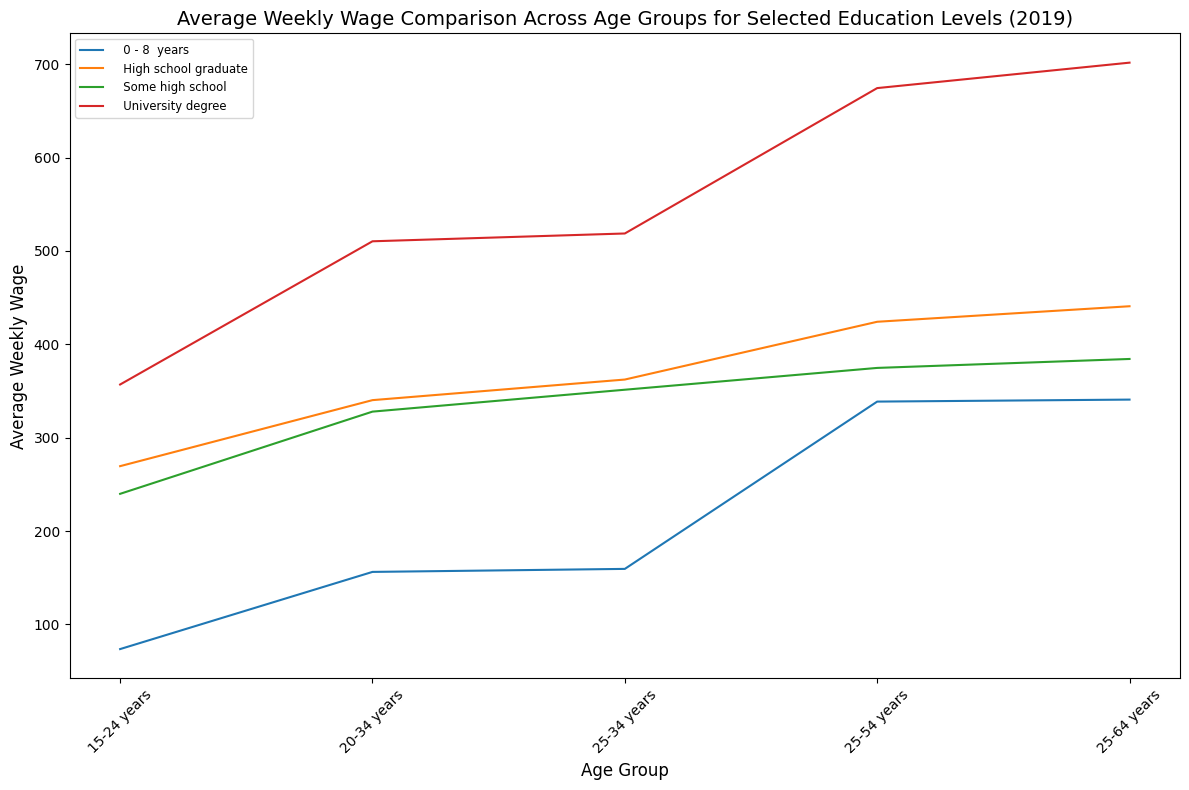

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('7b325fa1-e9d6-4329-a501-08cdc22a79df.csv')

# Convert 'Wages' column to numeric, ignoring non-numeric values
data['Wages'] = pd.to_numeric(data['Wages'], errors='coerce')

# Filter data for full-time workers and select the year 2019
data_2019 = data[(data['YEAR'] == 2019) & data['Type of work'].str.contains('Full-time', case=False)]

# Filter data for the specified education levels
education_levels = ["   0 - 8  years", "   Some high school", "   High school graduate", "   University degree", "   Trade certificate or diploma"]
data_2019 = data_2019[data_2019['Education level'].isin(education_levels)]

# Remove '15 years and over', '25 years and over', and '55 years and over' age groups
data_2019 = data_2019[~data_2019['Age group'].isin(['15 years and over ', '25 years and over', '55 years and over'])]

# Group data by education level and age group and calculate the mean wage for both sexes
mean_wages_by_edu_age = data_2019.groupby(['Education level', 'Age group'])['Both Sexes'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))

# Create a line plot for each education level
for edu_level in mean_wages_by_edu_age['Education level'].unique():
    subset_data = mean_wages_by_edu_age[mean_wages_by_edu_age['Education level'] == edu_level]
    sns.lineplot(x='Age group', y='Both Sexes', data=subset_data, label=edu_level)

# Adding labels and title
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Weekly Wage', fontsize=12)
plt.title("Average Weekly Wage Comparison Across Age Groups for Selected Education Levels (2019)", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show legend
plt.legend(fontsize='small', loc='upper left')

plt.tight_layout()
plt.show()

# Key Take Aways from visualization #3

for people aged 54+ wage compensation appears to plateau with '0-8 years' of educational attainment

*Conclusion*


based on the results from the visualizations, it is clearly visible that lower levels of education attainment such as '0-8 years' are most discrimnatory in terms of career progress. These democraphic groups often exhibit the least amount of growth in wage compensation and have the highest wage gap between male and female genders. Inversely, in demographics with higher educational attainment the gender wage gap is much less in particular to those with a 'University degree' and above. The highest disparities paired with education in order are age, geographic location, followed by gender. From these findings the data highlights that educational attainment serves as a significant predictor of future career success. 
